# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Florian Weiß

Datum: 22.11.2023

Gruppe: 99

## Forschungsfrage



Wie groß ist die Wärmekapazität eines Smoothie-Bechers?

## Versuchsaufbau und Durchführung

Zur Bestimmung der Wärmekapazität werden zwei mit einer gleichen Menge Wasser gefüllte Becher unter laufender Temperaturmessung beider Wassermassen zusammengeschüttet. Die Messung läuft so lange mit beiden Sensoren weiter, bis die gesamte Wassermasse ihre finale Mischungstemperatur erreicht hat. Daraus kann anschließend die Wärmekapazität des Bechers bestimmt werden.

<img src="Bild_Waermekapazitaet_Weiss.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [9]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

# save path to h5 file
path_h5 = "/home/jovyan/work/calorimetry_home/data/heat_capacity_weiss.h5"

# DONE #

In [17]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

# import h5 lib
import h5py as h5

# access h5 file
with h5.File(path_h5, 'r') as f:
    capacity_data = f["RawData"] # save subgroup RawData
    dataset_capacity = {} # create empty dictionary 
    sensor_ids = [] # create empty list of sensor uuids
    
    # for each sensor, read attributes, temperature and time and save to dictionary
    for uuid_key in capacity_data.keys():
        uuid_group = capacity_data[uuid_key] # create path for easier access to data
        sensor_ids.append(uuid_key) # add sensor uuid to list
        
        attributes = dict(uuid_group.attrs) # get the attributes
        
        temp_data = uuid_group['temperature'][:] # get temp
        time_data = uuid_group['time'][:] # get time
        
        # save attrs, temp and time to the dict
        dataset_capacity[uuid_key] = {
            'attributes': attributes,
            'temperature': temp_data,
            'time': time_data
        }
        
# DONE #

#### (ii) Daten ploten

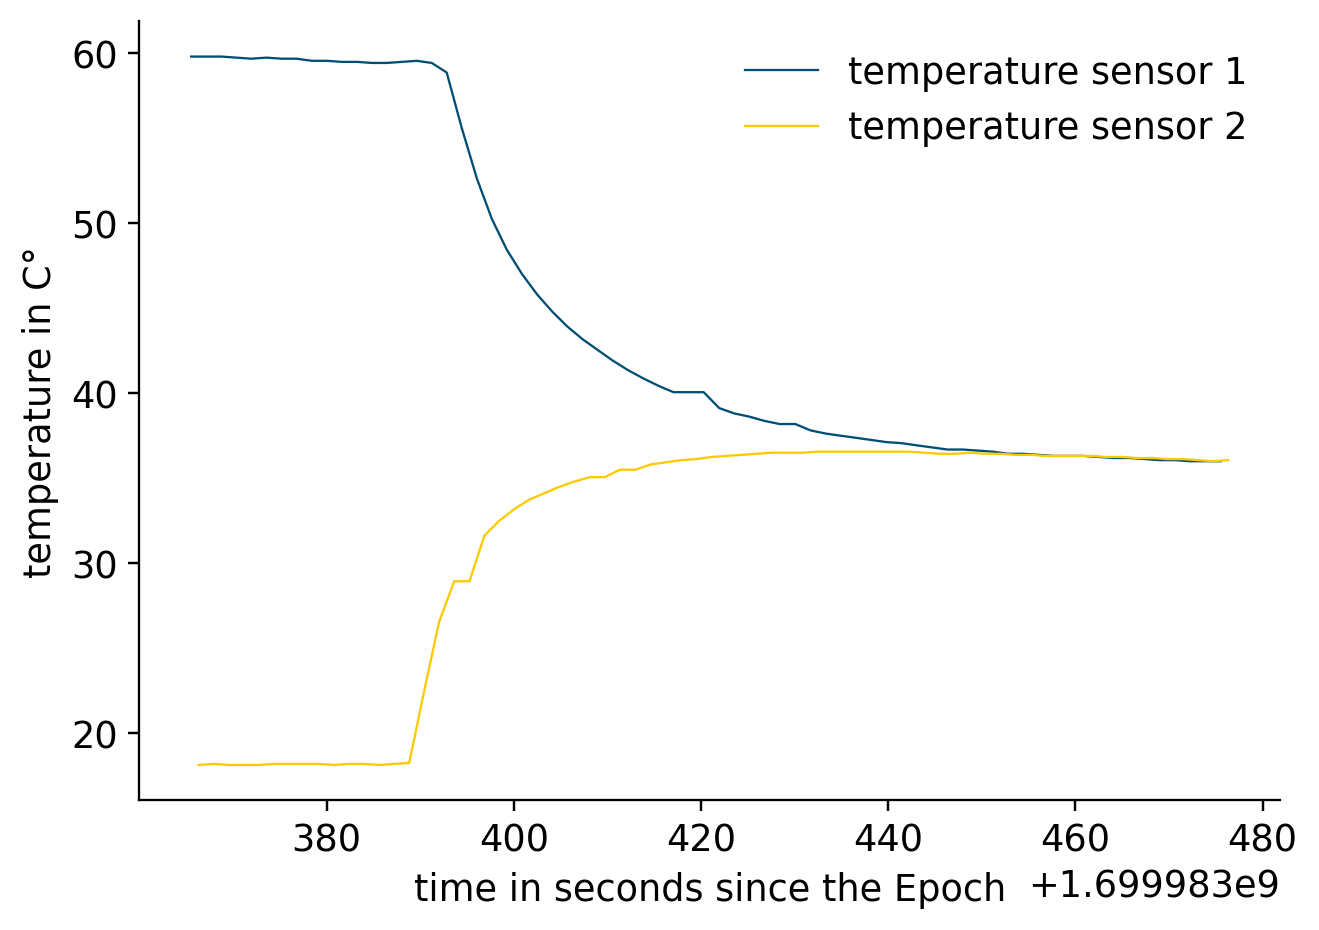

In [21]:
# TODO: Use the temperature and time data for plotting

# create sensor paths for easier access
uuid_1_data = dataset_capacity[sensor_ids[0]] 
uuid_2_data = dataset_capacity[sensor_ids[1]]

# plot the data
plt.plot(uuid_1_data['time'], uuid_1_data['temperature'], label= 'temperature sensor 1')
plt.plot(uuid_2_data['time'], uuid_2_data['temperature'], label= 'temperature sensor 2')

# make the data pretty and understandable
plt.xlabel('time in seconds since the Epoch')
plt.ylabel('temperature in C°')
plt.legend()
plt.show()

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [23]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

# save json folder path
json_folder = "/home/jovyan/work/calorimetry_home/data/"

# get mass entry from probe file
mass_water_single = m_json.get_json_entry(json_folder,'1ee822e1-695a-606b-a3a0-99ccca8301f5',['probe','metadata'])

# since both water bodies were equal, multiply by 2 to get total water mass...
mass_water_total = int(mass_water_single)*2/1000 # ...and convert to kg

print(mass_water_total) # print 

# DONE #

0.5


#### (iV) Anfangs- und Endwert der Temperatur

In [25]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

start_temp_1 = uuid_1_data['temperature'][0] # get start temp of sensor 1
end_temp_1 = uuid_1_data['temperature'][-1]  # get end temp of sensor 1

start_temp_2 = uuid_2_data['temperature'][0] # get start temp of sensor 2
end_temp_2 = uuid_2_data['temperature'][-1] # get end temp of sensor 2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [28]:
# TODO: Calculate heat capacity of the calorimeter

# setup
    # in both cups is equal amount of water
m_add = mass_water_total/2 
m_cup = mass_water_total/2 
    # save parameters to same as in formula
T_1 = start_temp_2
T_2 = start_temp_1
T_M = end_temp_1
c_w = water_heat_capa

# calculation with Heat Capacity Formula
heat_capacity = (m_add*c_w*(T_2-T_M))/(T_M-T_1)-m_cup*c_w

# DONE #

#### (Vi) Ergebnis

In [31]:
# TODO: Print result
print('Die Wärmekapazität des Smoothie-Bechers betraegt in kJ/kg/K:')
print(heat_capacity)

# DONE #

Die Wärmekapazität des Smoothie-Bechers betraegt in kJ/kg/K:
0.3471153846153847


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Nach Durchführung des Versuchs wurde die Wärmekapazität des Smoothie-Bechers bestimmt: sie beläuft sich auf etwa 347,115 J/kg/K. Damit liegt sie in einer ähnlichen Größenordnung wie Kupfer. Der Wert scheint mir dadurch durchaus realistisch, da er auch deutlich kleiner ist als gängige Dämmstoffe, deren Wärmekapazitäten oberhalb von 1000 J/kg/K anzusiedeln sind

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Nach Abschließen dieses Versuchs kann ich mir die Wärmekapazität deutlich besser vorstellen. Zu beobachten, wie die Wassermassen sich vermischen und die Temperaturen sich immer weiter annähern, war sehr zufriedenstellend. Allerdings sollte darauf geachtet werden, anfangs nicht eine zu hohe Wassertemperatur des heißen Bechers zu nehmen, um eine lange Wartezeit dieser beim Abkühlen auf die geforderten maximal 60 Grad zu vermeiden. Auch war ich vorerst der Wasserdichtheit der Sensoren eher skeptisch, aber nach dem ersten Zusammenschütten war alle Skepsis verflogen.